# Reading and Plotting netCDF4 Files 

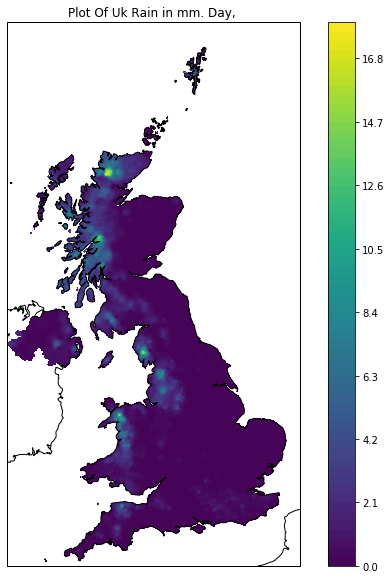

In [35]:
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy as cp
import matplotlib.pyplot as plt
import cartopy.feature as cfeature


#Replace the file name with any required file/filepath.

dataset = Dataset('D:/for/rainfall_hadukgrid_uk_1km_day_20170701-20170731.nc')

# The following will print out the variables within the file including type and length etc.

# print(dataset.variables)


# Reading the variables from the file. The name of the variable (e.g. rainfall/temp) is normally the first word of the filename. 


lat = dataset.variables['latitude'][:]
long = dataset.variables['longitude'][:]
rains = dataset.variables['rainfall'][:]




fig = plt.figure(figsize=(10, 10))


# Adds a plot of the UK with an outline of resolution 10m

ax = fig.add_subplot(projection=ccrs.OSGB())
ax.coastlines(resolution='10m')


# Reads the rainfall data in along with a lat/long and overlays it onto the plot of the UK

# Rains is a 2d array as there are 31 days for around 1 million locations in the UK

cf = plt.contourf(lat,long,rains[0], 60, transform=ccrs.PlateCarree())


# Adds a colour bar to the side of the plot.

fig.colorbar(cf, ax=ax)



plt.title('Plot Of Uk Rain in mm. Day, ')
plt.savefig(('kl.png'),dpi = 400) 
plt.show()

# Using a loop to plot several months of data

<Figure size 720x720 with 0 Axes>

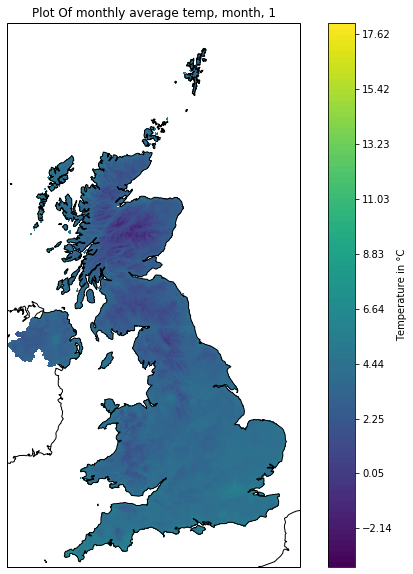

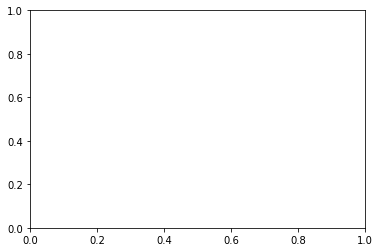

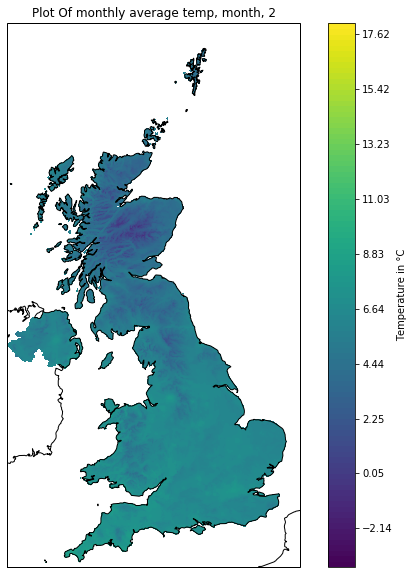

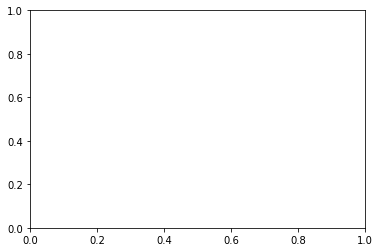

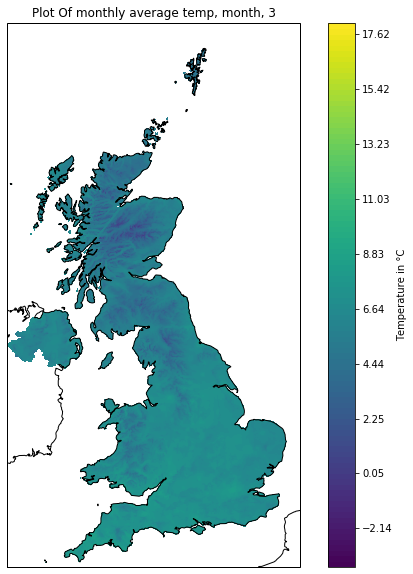

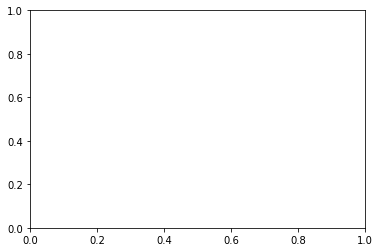

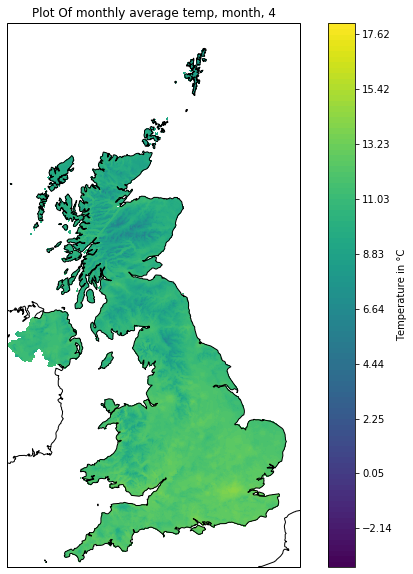

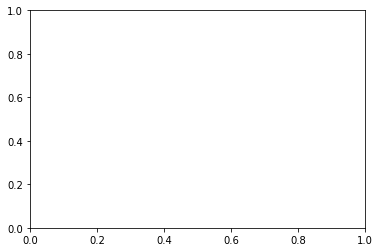

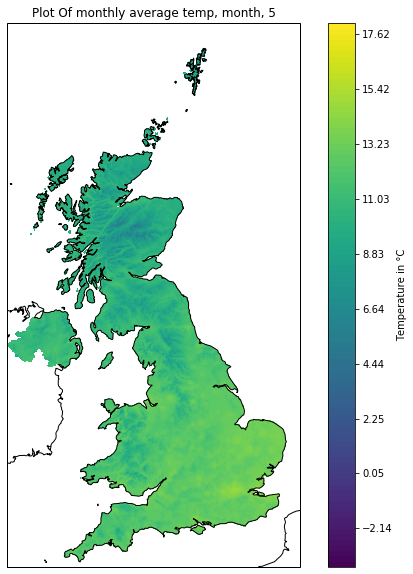

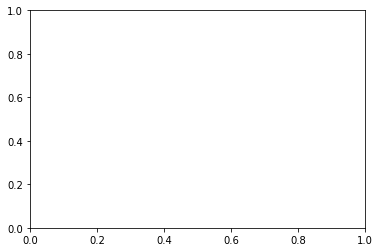

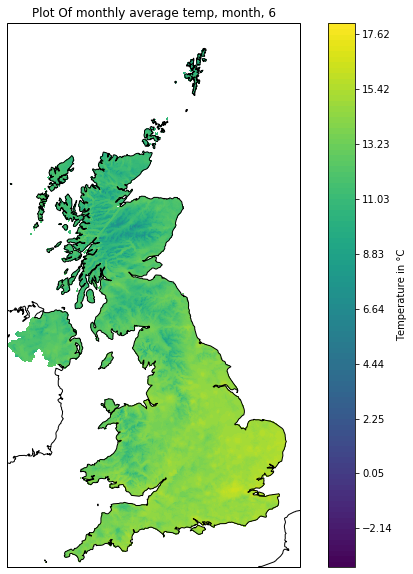

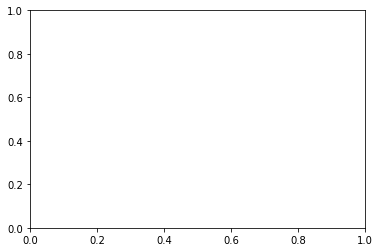

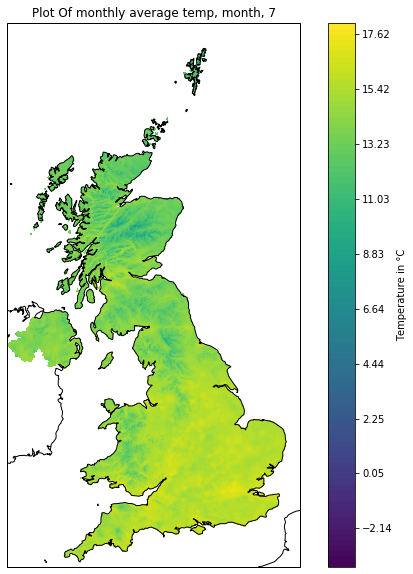

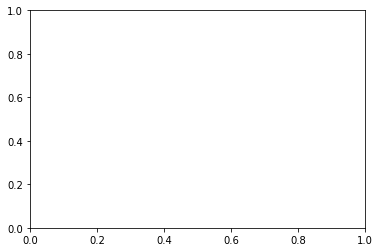

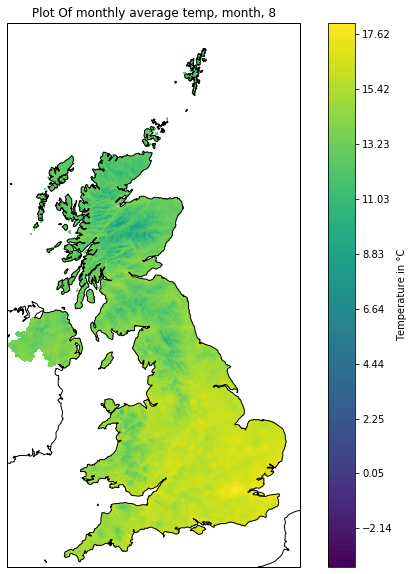

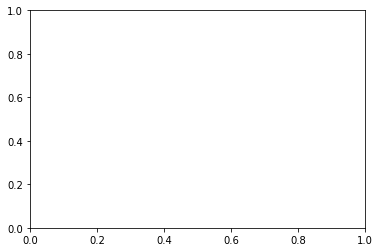

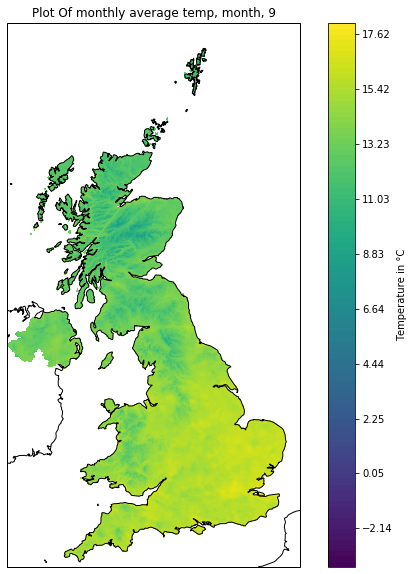

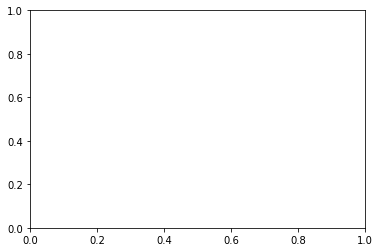

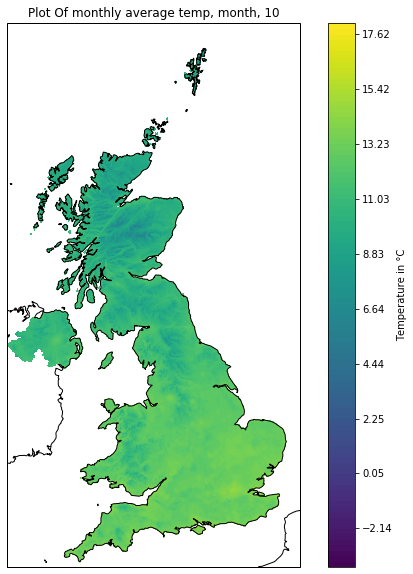

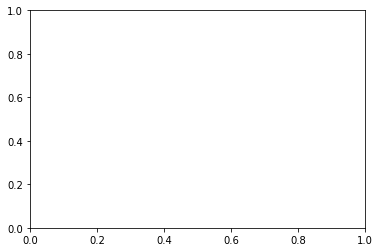

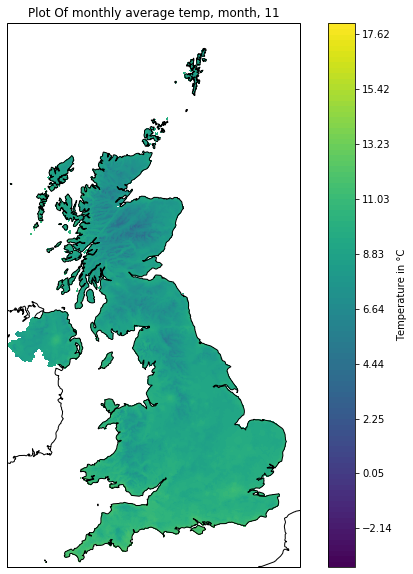

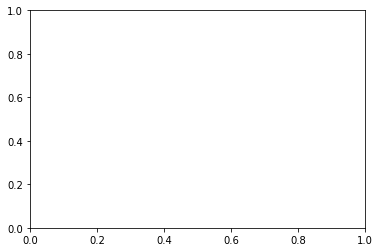

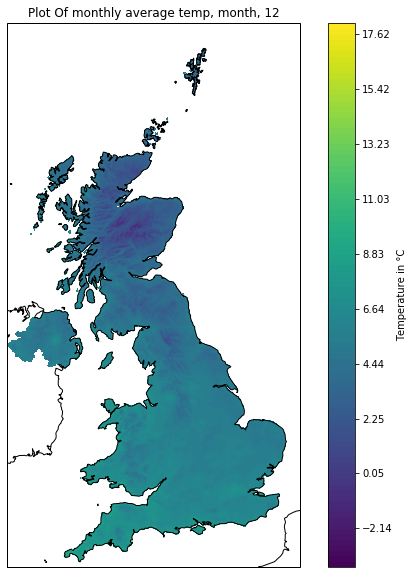

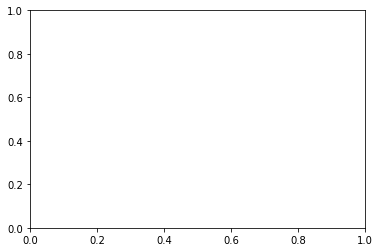

In [37]:
from netCDF4 import Dataset
import cartopy.crs as ccrs
import cartopy as cp
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import numpy as np
import matplotlib.animation as animation
from matplotlib import ticker


# Does the same as above as well as finding the min/max of the data set. 

dataset = Dataset('D:/Monthly Temp/tas_hadukgrid_uk_1km_mon_201101-201112.nc')

xl = dataset.variables['latitude'][:]
xt = dataset.variables['longitude'][:]
temps = dataset.variables['tas'][:]



fig = plt.figure(figsize=(10, 10))
vmean =temps.mean()
vmin = temps.min()
vmax = temps.max() 





counter = 0

# This is also the same as above apart from one key difference.
# Using the min and max values, the contour plots are scaled using the two absolutes of the data set.
# This keeps each month using the same scale. 

for item in temps:

    
    fig = plt.figure(figsize=(10, 10))
    counter += 1
    ax = fig.add_subplot(projection=ccrs.OSGB())
    ax.coastlines(resolution='10m')
    
    
    
    cf = plt.contourf(xt,xl,item, 60, transform=ccrs.PlateCarree(),levels = np.linspace(vmin,vmax,100))

    
    cbar = fig.colorbar(cf ,ax =ax,label = 'Temperature in °C',extend="max")
    
  
    plt.title('Plot Of monthly average temp, month, ' + str(counter))
    plt.savefig((str(counter)+ '.png'),dpi = 400) 
    plt.show()
    plt.cla()
    




## Using movie py to make a gif of the plots

In [39]:
import glob
import moviepy.editor as mpy



# This is a very basic way of doing it, and only works if the plots are saved as numbers

gif_name = 'MonthlyTemps'
fps = 4
file_list = glob.glob('*.png') 
file_list.sort(key=len)
clip = mpy.ImageSequenceClip(file_list, fps=fps)
clip.write_gif('{}.gif'.format(gif_name), fps=fps)


# The files are not deleted once the code has run...

MoviePy - Building file MonthlyTemps.gif with imageio.




t:  33%|██████████████████████▋                                             | 4/12 [2:03:47<00:09,  1.25s/it, now=None]


t:   0%|                                                                              | 0/13 [00:00<?, ?it/s, now=None]


t:  15%|██████████▊                                                           | 2/13 [00:03<00:16,  1.54s/it, now=None]


t:  23%|████████████████▏                                                     | 3/13 [00:05<00:18,  1.89s/it, now=None]


t:  31%|█████████████████████▌                                                | 4/13 [00:07<00:17,  1.96s/it, now=None]


t:  38%|██████████████████████████▉                                           | 5/13 [00:09<00:14,  1.81s/it, now=None]


t:  46%|████████████████████████████████▎                                     | 6/13 [00:10<00:11,  1.71s/it, now=None]


t:  54%|█████████████████████████████████████▋                                | 7/13 [00:12<00:09,  1.63s/it, now=None]


t:  62%|██████████████